In [3]:
import cv2
import pyautogui
import numpy as np
from keras.models import load_model
import keyboard
import cv2 as cv 
import numpy as np
import matplotlib.pyplot as plt
import mss.tools
import time
import uuid
import keyboard
import pyautogui
import time
import mss.tools
import uuid
import keyboard
from pynput import mouse

In [5]:
def screenshot():
    with mss.mss() as sct:
        time.sleep(1)
        monitor_info = sct.monitors[0]
        top_margin = (monitor_info["height"] // 3) + 50
        monitor = {"top": monitor_info["top"] + top_margin, "left": monitor_info["left"] + 55, "width": monitor_info["width"] - 120, "height": (monitor_info["height"] * 2 // 3)-105}
        output = f"testimages/{str(uuid.uuid4())}.png".format(**monitor)
        sct_img = sct.grab(monitor)
        mss.tools.to_png(sct_img.rgb, sct_img.size, output=output)
    return output

In [9]:
model = load_model('model_v2_iris.h5')

In [24]:
img_orig = cv.imread("DLIngrid\q/3bd9faf6-2375-4d13-b484-b468c8ae9f02.png")
img_rgb = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)
reshaped_image = np.expand_dims(img_rgb, axis=0)

In [26]:
prediction = model.predict(reshaped_image)

1/1 [==============================] - 1s 839ms/step


In [27]:
action_index = np.argmax(prediction)
confidence = prediction[0][action_index]

In [28]:
action_index = np.argmax(prediction)
confidence = prediction[0][action_index]
print(action_index)
print(confidence)

1
0.8737693


In [ ]:
time.sleep(5)
while not keyboard.is_pressed("space"):
    #test = 
    image = screenshot()


    

In [34]:
import splitfolders
input_folder = './DLIngrid'
output_folder = './datasetsingrid'
 
#split the images into 80% training and 20% testing sets
splitfolders.ratio(input_folder, output_folder, seed=40, ratio=(0.8, 0.2))

Copying files: 1407 files [00:08, 165.94 files/s]


In [45]:
from tensorflow.keras.applications.resnet50 import ResNet50
model = ResNet50(include_top=False, weights="imagenet", input_shape=(512, 512, 3))


In [1]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow.keras.optimizers as optimizers
from keras.layers import Dense, GlobalAveragePooling2D
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten
from keras.layers import Reshape

In [81]:
model = ResNet50V2(include_top=False, weights="imagenet", input_shape=(224, 224, 3))

94668760/94668760 [==============================] - 10s 0us/step


In [82]:
for layer in model.layers:
    layer.trainable = False

In [83]:
x = model.output

x = Dropout(0.5)(x)
x = BatchNormalization()(x)
#x = Reshape((1, 1, -1))(x)
#x = Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(x)  # Example convolutional layer
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
#x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)

classes = Dense(3, activation='softmax')(x) 


model = Model(inputs=model.input, outputs=classes)
optimizer = optimizers.Adam(learning_rate=0.01)


In [84]:
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [3]:
datagen = ImageDataGenerator(rescale=1./255,
                                rotation_range=20,
                                width_shift_range=0.1,
                                height_shift_range=0.1,
                                zoom_range=0.1,
                                shear_range=0.2,
                                channel_shift_range=0.2,
                                brightness_range=(0.8, 1.2),
                                #contrast_range=(0.9, 1.1),
                                #saturation_range=(0.8, 1.2),
                                
                                horizontal_flip=True)

In [4]:
train_data = datagen.flow_from_directory("./datasetsingrid/train", target_size=(224, 224), batch_size=120, class_mode="categorical")
val_data = datagen.flow_from_directory("./datasetsingrid/val", target_size=(224, 224), batch_size=120, class_mode="categorical")

Found 1125 images belonging to 3 classes.


Found 282 images belonging to 3 classes.


In [87]:
model.fit(train_data, epochs=10, validation_data=val_data)

Epoch 1/10
10/10 [==============================] - 48s 5s/step - loss: 6.3482 - accuracy: 0.5947 - val_loss: 3.4765 - val_accuracy: 0.7340
Epoch 2/10
10/10 [==============================] - 44s 4s/step - loss: 1.2944 - accuracy: 0.8098 - val_loss: 0.9867 - val_accuracy: 0.7801
Epoch 3/10
10/10 [==============================] - 44s 4s/step - loss: 0.7596 - accuracy: 0.8338 - val_loss: 0.6416 - val_accuracy: 0.7199
Epoch 4/10
10/10 [==============================] - 43s 4s/step - loss: 0.4337 - accuracy: 0.8560 - val_loss: 0.3210 - val_accuracy: 0.9043
Epoch 5/10
10/10 [==============================] - 44s 5s/step - loss: 0.4127 - accuracy: 0.8862 - val_loss: 0.4065 - val_accuracy: 0.8617
Epoch 6/10
10/10 [==============================] - 51s 5s/step - loss: 0.2994 - accuracy: 0.8907 - val_loss: 0.3940 - val_accuracy: 0.8972
Epoch 7/10
10/10 [==============================] - 50s 5s/step - loss: 0.3103 - accuracy: 0.8996 - val_loss: 0.2966 - val_accuracy: 0.8901
Epoch 8/10
10/10 [==

In [88]:
model.save('goodmaybe.keras')

In [90]:
model.save('goodmaybe.h5')

c:\Users\ingri\anaconda3\envs\mss\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [7]:
modelsaved = load_model('goodmaybe.keras')

In [241]:
img_orig = cv.imread("dataset/1c4f5623-a407-4d00-876f-506e4bc5a76b.png")
img_rgb = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)
img = cv2.resize(img_rgb, (224, 224))
img_resized = img.astype('float32') / 255.0 
reshaped_image = np.expand_dims(img, axis=0)

In [242]:
no = modelsaved.predict(reshaped_image)

1/1 [==============================] - 0s 70ms/step


In [243]:
action_index = np.argmax(no)
confidence = no[0][action_index]
print(action_index)
print(confidence)

0
0.99879956


In [244]:
no[0]

array([9.9879956e-01, 1.2004360e-03, 3.8443094e-12], dtype=float32)

3/3 [==============================] - 10s 2s/step


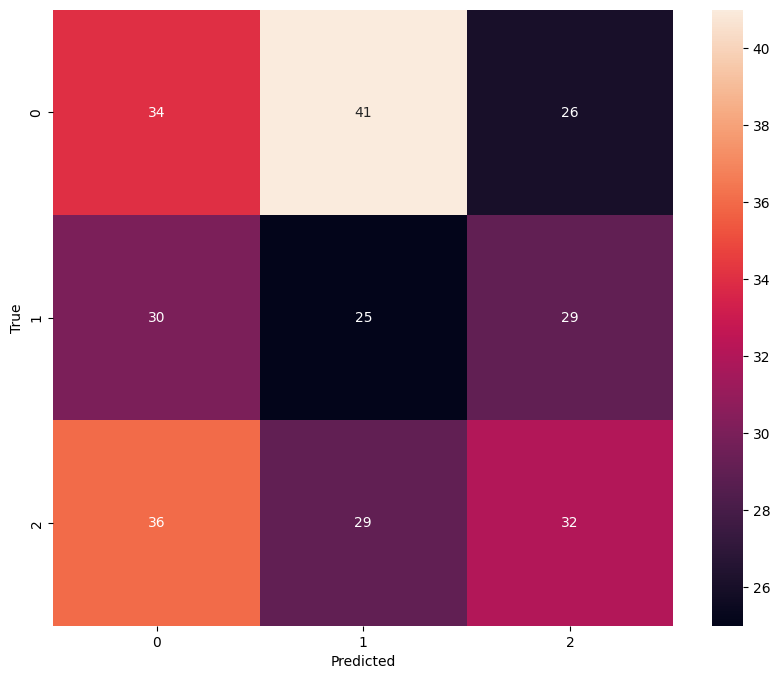

In [8]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `model` is your trained model
# Get the true labels
y_true = val_data.classes

# Predict the values from the validation dataset
Y_pred = modelsaved.predict(val_data, verbose=1)

# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis=1) 

# compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, Y_pred_classes) 

# plot the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()